Тема урока: модуль re
Модуль re
Функция search()
Функция match()
Функция fullmatch()
Объект Match
Флаги
Функция escape()
Аннотация. Данный урок посвящен модулю re, который позволяет работать с регулярными выражениями в Python.

Модуль re

В Python для работы с регулярными выражениями используется встроенный модуль re. Для начала работы с ним его нужно импортировать:

In [1]:
import re

Функция search()

Функция search() сканирует строку в поисках первого совпадения с регулярным выражением и возвращает специальный объект соответствия (тип Match) или значение None, если ни одна позиция в строке не соответствует регулярному выражению. 

Аргументы функции:

pattern — шаблон регулярного выражения
string — строка для поиска
flags=0 — один или несколько флагов (необязательный аргумент)

In [2]:
from re import search

match1 = search('super', 'superstition')
match2 = search('super', 'insuperable')
match3 = search('super', 'without')

print(match1)
print(match2)
print(match3)

<re.Match object; span=(0, 5), match='super'>
<re.Match object; span=(2, 7), match='super'>
None


In [1]:
from re import search

match1 = search(r'\d+', 'foo123bar')
match2 = search(r'[a-z]+', '123FOO456')
match3 = search(r'\d+', 'foo.bar')

print(match1)
print(match2)
print(match3)

<re.Match object; span=(3, 6), match='123'>
None
None


Функция search() возвращает специальный объект соответствия (тип Match), о котором будет рассказано ниже. 

Функция match()

Функция match() возвращает специальный объект соответствия (тип Match), если начало строки соответствуют регулярному выражению, или значение None в противном случае.

Аргументы функции:

pattern — шаблон регулярного выражения
string — строка для поиска
flags=0 — один или несколько флагов (необязательный аргумент)

In [4]:
from re import match

match1 = match('super', 'superstition')
match2 = match('super', 'insuperable')

print(match1)
print(match2)

<re.Match object; span=(0, 5), match='super'>
None


In [9]:
from re import search, match

match1 = search(r'\d+', '123foobar')
match2 = search(r'\d+', 'foo123bar')
match3 = match(r'\d+', '123foobar')
match4 = match(r'\d+', 'foo123bar')

print(match1)
print(match2)
print(match3)
print(match4)

<re.Match object; span=(0, 3), match='123'>
<re.Match object; span=(3, 6), match='123'>
<re.Match object; span=(0, 3), match='123'>
None


В приведенном выше примере функция search() находит соответствие, когда последовательность цифр находится как в начале строки, так и в середине. При этом функция match() находит соответствие только тогда, когда последовательность цифр находится вначале.

Функция match() проверяет совпадение регулярного выражения только в начале строки, в то время как функция search() сканирует всю строку на предмет первого совпадения с шаблоном регулярного выражения.

Функция fullmatch()

Функция fullmatch() возвращает специальный объект соответствия (тип Match), если вся строка соответствует регулярному выражению, или значение None в противном случае.

Аргументы функции:

pattern — шаблон регулярного выражения
string — строка для поиска
flags=0 — один или несколько флагов (необязательный аргумент)

In [10]:
from re import fullmatch

match1 = fullmatch(r'\d+', '123foo')
match2 = fullmatch(r'\d+', 'foo123')
match3 = fullmatch(r'\d+', 'foo123bar')
match4 = fullmatch(r'\d+', '123')

print(match1)
print(match2)
print(match3)
print(match4)

None
None
None
<re.Match object; span=(0, 3), match='123'>


Регулярному выражению \d+ соответствует последовательность цифр. Из всех четырех строк в приведенном выше примере только строка 123 полностью состоит из цифр.

Обратите внимание на то, что мы можем эмулировать работу функции fullmatch() с помощью функции search(), добавив в шаблон регулярного выражения метасимволы начала (символ ^) и конца строки (символ $).

In [12]:
from re import search

match = search(r'^\d+$', '123')

print(match)

<re.Match object; span=(0, 3), match='123'>


Функцию fullmatch() удобно использовать для валидации правильности данных.

In [14]:
from re import fullmatch

phone_pattern = r'\d{3}-\d{3}-\d{4}'

match1 = fullmatch(phone_pattern , '777-888-1234')
match2 = fullmatch(phone_pattern , '77-89-56')
match3 = fullmatch(phone_pattern , '5555-99-1234')
match4 = fullmatch(phone_pattern , '123-000-3333ab')

print(match1)
print(match2)
print(match3)
print(match4)

<re.Match object; span=(0, 12), match='777-888-1234'>
None
None
None


проверяет соответствие строк регулярному выражению ddd-ddd-dddd (три цифры дефис три цифры дефис четыре цифры)

Объекты типа Match

Все три рассмотренные функции search(), match(), fullmatch() при успешном соответствии регулярному выражению возвращают объект типа Match. Объекты такого типа приводятся к типу bool автоматически, поэтому мы можем использовать их в условном операторе.

In [16]:
from re import search, fullmatch

match = fullmatch(r'\d{3}-\d{3}-\d{4}', '777-888-1234')

if match:
    print('Строка соответствует формату.')
    print(match)
else:
    print('Строка не соответствует формату.')

Строка соответствует формату.
<re.Match object; span=(0, 12), match='777-888-1234'>


Значение None отождествляется с False. Поэтому в случае если функция fullmatch() вернет значение None, то сработает блок else условного оператора.

Объекты типа Match также содержат немало полезной информации о совпадении. Рассмотрим основные методы и атрибуты.

Метод group()

Метод group() возвращает одну или несколько подгрупп совпадения. Если метод вызывается без аргументов, то возвращается вся подстрока, которая совпала с шаблоном регулярного выражения.

In [18]:
from re import search

match = search(r'(\w+),(\w+),(\w+)', 'foo,bar,baz')

print(match.group())                       # вся строка
print(match.group(0))                      # вся строка
print(match.group(1))                      # подгруппа
print(match.group(2))                      # подгруппа
print(match.group(3))                      # подгруппа
print(match.group(1, 2, 3))                # кортеж

foo,bar,baz
foo,bar,baz
foo
bar
baz
('foo', 'bar', 'baz')


В качестве аргумента можно указать как одну группу, так и несколько. В первом случае метод вернет строку, соответствующую группе, во втором — кортеж строк, соответствующих указанным группам.

Вызов метода group() без аргументов, равнозначен вызову с аргументом 0, то есть group(0).

Если методу group() передать индекс несуществующей группы, то будет возбуждено исключение.

In [20]:
from re import search

match = search(r'(\w+),(\w+),(\w+)', 'foo,bar,baz')

print(match.group(4))

IndexError: no such group

Переданная в качестве аргумента группа может появляться несколько раз, при этом мы можем указывать любые группы в любом порядке.

In [22]:
from re import search

match = search(r'(\w+),(\w+),(\w+)', 'foo,bar,baz')

print(match.group(1, 2, 3, 1, 2, 2, 3, 3, 3, 3))

('foo', 'bar', 'baz', 'foo', 'bar', 'bar', 'baz', 'baz', 'baz', 'baz')


Пронумерованные захваченные группы отсчитываются от единицы, а не от нуля.

Если мы пользуемся именованными группами, используя синтаксис (?P<name><regex>), тогда мы можем использовать название группы в качестве аргумента метода group().

In [24]:
from re import search

match = search(r'(?P<w1>\w+),(?P<w2>\w+),(?P<w3>\w+)', 'foo,bar,baz')

print(match.group())
print(match.group('w1'))
print(match.group('w2'))
print(match.group('w3'))
print(match.group('w1', 'w2', 'w3', 'w2', 'w3'))

foo,bar,baz
foo
bar
baz
('foo', 'bar', 'baz', 'bar', 'baz')


Обратите внимание на то, что метод group() может возвращать в качестве группы значение None. Так происходит в ситуации, когда группа не участвует в сопоставлении.

In [26]:
from re import search

match = search(r'(\w+),(\w+),(\w+)?', 'foo,bar,')

print(match.group())
print(match.group(0))
print(match.group(1))
print(match.group(2))
print(match.group(3))
print(match.group(1, 2, 3))

foo,bar,
foo,bar,
foo
bar
None
('foo', 'bar', None)


Метод groups()

Метод groups() возвращает кортеж, содержащий все захваченные группы.

In [28]:
from re import search

match = search(r'(\w+),(\w+),(\w+)?', 'foo,bar,')

print(match.groups())

('foo', 'bar', None)


Группы, которые не смогли захватить какой-либо результат, по умолчанию будут иметь значение None. Если в такой ситуации требуется вернуть значение, отличное от None, то используется необязательный аргумент default.

In [30]:
from re import search

match = search(r'(\w+),(\w+),(\w+)?', 'foo,bar,')

print(match.groups(-1))                     # позиционный аргумент
print(match.groups(''))
print(match.groups(default='----'))         # именованный аргумент
print(match.groups(default=False))

('foo', 'bar', -1)
('foo', 'bar', '')
('foo', 'bar', '----')
('foo', 'bar', False)


Метод groupdict()

Метод groupdict() возвращает словарь, содержащий все захваченные именованные группы.

In [33]:
from re import search

match = search(r'(?P<w1>\w+),(?P<w2>\w+),(?P<w3>\w+)', 'foo,bar,baz')

print(match.groupdict())

{'w1': 'foo', 'w2': 'bar', 'w3': 'baz'}


Метод groupdict(), как и метод groups(), принимает необязательный аргумент default, который используется для указания значений групп, которые не смогли захватить какой либо результат. По умолчанию значение данного аргумента равно None.

In [35]:
from re import search

match = search(r'(?P<w1>\w+),(?P<w2>\w+),(?P<w3>\w+)?', 'foo,bar,')

print(match.groupdict())
print(match.groupdict(default=''))
print(match.groupdict(default='----'))

{'w1': 'foo', 'w2': 'bar', 'w3': None}
{'w1': 'foo', 'w2': 'bar', 'w3': ''}
{'w1': 'foo', 'w2': 'bar', 'w3': '----'}


Если именованных групп в исходном регулярном выражении нет, метод groupdict() возвращает пустой словарь.

In [37]:
from re import search

match = search(r'(\w+),(\w+),(\w+)?', 'foo,bar,buz')

print(match.groupdict())
print(match.groupdict(default=''))
print(match.groupdict(default='----'))

{}
{}
{}


Методы start() и end()

Методы start() и end() возвращают индексы начала и конца подстроки, которая совпала с регулярным выражением.

In [38]:
from re import search

match = search(r'\d+', 'foo123bar456baz')

print(match)
print(match.start())
print(match.end())

<re.Match object; span=(3, 6), match='123'>
3
6


Обратите внимание на то, что при выводе объекта Match мы видим значения, возвращенные методами start() и end(), собранные в виде кортежа span.

Значения, возвращаемые методами start() и end(), можно использовать для того чтобы получить подстроку, которая совпала с шаблоном регулярного выражения.

In [39]:
from re import search

text = 'foo123bar456baz'

match = search(r'\d+', text)

start = match.start()
end = match.end()

print(match)
print(text[start:end])
print(match.group())           # аналогично предыдущей строке

<re.Match object; span=(3, 6), match='123'>
123
123


В методы start() и end() также можно передать номер или названия группы. В этом случае методы вернут индексы начала и конца подстроки, совпадающей с нужной группой.

In [40]:
from re import search

text = 'foo123bar456baz'

match = search(r'(\d+)\D+(?P<num>\d+)', text)

print(match)
print(match.group(), match.start(), match.end())
print(match.group(1), match.start(1), match.end(1))
print(match.group('num'), match.start('num'), match.end('num'))

<re.Match object; span=(3, 12), match='123bar456'>
123bar456 3 12
123 3 6
456 9 12


Если некоторая группа соответствует строке нулевой длины, то значения возвращаемые методами start() и end() будут равны. Достаточно разумное поведение, учитывая, что значения, возвращаемые методами start() и end() действуют как индексы среза. Любой срез строки, в котором начальный и конечный индексы равны, всегда будет пустой строкой.

In [47]:
from re import search

match = search(r'foo(\d*)bar', 'foobar')

print(match)
print(match.group())
print(match.start(), match.end())
print(match.start(1), match.end(1))

<re.Match object; span=(0, 6), match='foobar'>
foobar
0 6
3 3


Особый случай возникает, когда регулярное выражение содержит группу, не участвующую в сопоставлении. В этом случае оба метода вернут значение −1.

In [49]:
from re import search

match = search(r'(\w+),(\w+),(\w+)?', 'foo,bar,')

print(match.group(3))
print(match.start(3), match.end(3))

None
-1 -1


Метод span()

Метод span() возвращает индексы начала и конца подстроки в виде кортежа, которая совпала с регулярным выражением. В метод span() также можно передать номер или название группы. В этом случае метод вернет индексы начала и конца подстроки в виде кортежа, совпадающей с нужной группой.

In [51]:
from re import search

match = search(r'(\d+)\D+(?P<num>\d+)', 'foo123bar456baz')

print(match)
print(match.span())
print(match.span(1))
print(match.span('num'))
print(match.span(2))

<re.Match object; span=(3, 12), match='123bar456'>
(3, 12)
(3, 6)
(9, 12)
(9, 12)


Метод span() просто предоставляет удобный способ получить как начальный, так и конечный индексы подстроки, которая совпала с регулярным выражением. Метод span() возвращает кортеж вида  (start(), end()).

Примечания

Примечание 6. Функция match() возвращает None, если начало строки не соответствует регулярному выражению. Обратите внимание, что это поведение отличается от совпадения нулевой длины.

Телефонные номера
Вам доступен набор телефонных номеров, имеющих следующие форматы:

<код страны>-<код города>-<номер>
<код страны> <код города> <номер>
в котором код страны и код города представлены последовательностями от одной до трех цифр включительно, а номер — последовательностью от четырех до десяти цифр включительно. Между кодом страны, кодом города и номером используется разделитель, которым служит либо символ дефис, либо пробел, причем одновременно оба вида разделителя в одном номере присутствовать не могут.

Напишите программу, которая принимает произвольное количество телефонных номеров и для каждого выводит отдельно его код страны, код города и номер.

Формат входных данных
На вход программе подается произвольное количество телефонных номеров, удовлетворяющих приведенным выше шаблонам, каждый на отдельной строке.

Формат выходных данных
Программа должна для каждого введенного телефонного номера вывести отдельно его код страны, код города и номер в следующем формате:

Код страны: <код страны>, Код города: <код города>, Номер: <номер>

In [15]:
import re
from sys import stdin

s = '''
1 877 2638277
91-011-23413627
'''
s = '''
148-809-2561957985
1 5 5864
91-454-91954
'''
# s = stdin.read()
# s = open(0).read()

regex = r'(\d+)[ -](\d+)[ -](\d+)'

# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(f'Код страны: {match.group(1)}, Код города: {match.group(2)}, Номер: {match.group(3)}')

Код страны: 148, Код города: 809, Номер: 2561957985
Код страны: 1, Код города: 5, Номер: 5864
Код страны: 91, Код города: 454, Номер: 91954


In [ ]:
import re
import sys

pattern = r"(?P<country>\d{1,3})([ -]?)(?P<city>\d{1,3})\2(?P<number>\d{4,10})"
for number in map(str.rstrip, sys.stdin):
    match = re.fullmatch(pattern, number)
    groups = match.groupdict()
    print(f"Код страны: {groups['country']}, Код города: {groups['city']}, Номер: {groups['number']}")

Онлайн-школа BEEGEEK
В онлайн-школе BEEGEEK логин учетной записи определяется следующим образом:

первым символом является символ нижнего подчеркивания _
затем следуют одна или более цифр
после записываются ноль или более латинских букв в произвольном регистре
логин может иметь на конце необязательный символ нижнего подчеркивания _
Напишите программу, которая принимает произвольное количество строк и определяет, какие из них представляют собой корректный логин онлайн-школы BEEGEEK.

Формат входных данных
На вход программе подаётся произвольное количество строк, каждая из которых содержит набор произвольных символов.

Формат выходных данных
Программа должна для каждой введенной строки вывести True, если она представляет собой корректный логин онлайн-школы BEEGEEK, или False в противном случае.

In [82]:
import re
from sys import stdin

s = '''
_123abc_
_1abc_
123abc
_abc123
_123abc__
'''
s = '''
_1
_1_
'''

# s = open(0).read()
# s = stdin.readline().strip()

regex = r'_\d+[A-Za-z]*_?'

# matches = re.findall(regex, s)
# print(re.fullmatch(regex, s))

lines = s.strip().split('\n')

for line in lines:
    if re.fullmatch(regex, line):
        print(True)
    else:
        print(False)

True
True


In [ ]:
import re
import sys

reg = r'_\d+[a-zA-Z]*_?'

for i in sys.stdin:
    grou = re.fullmatch(reg, i.strip())
    print(bool(grou))

In [ ]:
import re

reg = r'_\d+[a-zA-Z]*_?'

for i in open(0):
    print(not not re.match(reg, i))

In [ ]:
import re

reg = r'^_\d+[a-zA-Z]*_?$'

for i in open(0):
    print(bool(re.match(reg, i.strip())))

Одинаковые слоги
Напишите программу, которая выводит слова, состоящие из двух одинаковых частей.

Формат входных данных
На вход программе подается произвольное количество слов, каждое на отдельной строке.

Формат выходных данных
Программа должна из введенных слов вывести только те, которые состоят из двух одинаковых слогов. Слова должны быть расположены в своем исходном порядке, каждое на отдельной строке.

Примечание 1. Словом будем считать любую непрерывную последовательность из одного или нескольких символов, соответствующих \w.

In [36]:
import re

regex = r'^(\w+)\1$'
s = '''
Python
beebee
PyPy
portal
'''
s = '''
gogo
hohoho
XaXaXaXa
'''


lines = s.strip().split('\n')

for line in lines:
    if re.match(regex, line):
        print(line)

gogo
XaXaXaXa


In [ ]:
import re, sys

for line in sys.stdin:
    if re.fullmatch(r'(\w+)\1', s := line.strip()):
        print(s)

Beegeek
Напишите программу, определяющую:

количество строк, в которых bee встречается в качестве подстроки не менее двух раз
количество строк, в которых geek встречается в качестве слова хотя бы один раз
Формат входных данных
На вход программе произвольное количество строк, каждая из которых содержит набор произвольных символов.

Формат выходных данных
Программа должна вывести два числа:

первое — количество строк, в которых bee встречается в качестве подстроки не менее двух раз
второе — количество строк, в которых geek встречается в качестве слова хотя бы один раз
каждое на отдельной строке.

Примечание 1. Словом будем считать любую непрерывную последовательность из одного или нескольких символов, соответствующих \w.

Примечание 2. Строка может одновременно удовлетворять обоим условиям.

Примечание 3. В первой строке первого теста bee встречается в качестве подстроки 3 раза:

beebee bee
Во второй строке bee встречается в качестве подстроки лишь один раз, а слово geek отсутствует.

В третьей строке bee встречается в качестве подстроки 2 раза, geek в качестве слова — 1 раз:

bee geek bee

In [88]:
import re, sys

regex1 = r'((bee).*){2,}'
regex2 = r'(\b(geek)\b)+'

s = '''
beebee bee
beegeek
bee geek bee
'''
s = '''
abigail alex
clint dwarf
emily
gil
'''
s = '''
bee one bee two
abee beeb
abeeb bee
geek
bee
geek geek geek
one geek two geek
'''

# s = sys.stdin.read()

print(len(re.findall(regex1, s)))
print(sum(1 for line in s.strip().split('\n') if re.search(regex2, line)))


3
3


Популярность
В онлайн-школе BEEGEEK мы всегда следим за тем, насколько растет наша популярность. Для этого мы собираем публикации из различных соцсетей, которые содержат вхождения строки beegeek в нижнем регистре. Мы оцениваем публикацию:

в 3 балла, если она начинается и заканчивается строкой beegeek
в 2 балла, если она только начинается или только заканчивается строкой beegeek
в 1 балл, если она содержит строку beegeek только внутри
в 0 баллов, если она не содержит строку beegeek
Напишите программу, которая определяет популярность онлайн-школы BEEGEEK путем суммирования баллов всех публикаций.

Формат входных данных
На вход программе подается произвольное число строк, каждая из которых представляет очередную публикацию.

Формат выходных данных
Программа должна определить, во сколько баллов оценивается каждая введенная публикация, и вывести сумму всех полученных баллов.

Примечание 1. Если публикация представляет собой просто строку beegeek, то она оценивается в 2 балла.

In [5]:
import re, sys

regex1 = r'^(beegeek).*(beegeek)$'
regex2 = r'^(beegeek.*|.*beegeek)$'
regex3 = r'^.+(beegeek).+'

# s = sys.stdin.read()

s = '''
hi, beegeek
beegeek is an awesome place for programmers
beegeek rocks, rocks beegeek
i think beegeek is a great place to hangout
'''
s = '''
good morning everyone
i am going to school
and it is raining
'''
s = '''
beegeekabcdbeegeek
beegeek green apple beegeek
beegeekbeegeek
beegeek___beegeek
beegeek12345beegeek
beegeek beegeek
beegeek     beegeek
beegeekbeegeekbeegeek
'''

count1 = sum(3 for line in s.strip().split('\n') if re.search(regex1, line))
# for line in s.strip().split('\n'):
#     print(re.search(regex1, line))
# print(count1)
count2 = sum(2 for line in s.strip().split('\n') if re.search(regex2, line) 
             and not re.search(regex1, line))
# print(count2)
count3 = sum(1 for line in s.strip().split('\n') if re.search(regex3, line)
             and not re.search(regex1, line))
# print(count3)

print(count1+count2+count3)

24


Флаги

Все три рассмотренные функции search(), match(), fullmatch() принимают необязательный аргумент flags. Использование флагов изменяет поведение синтаксического анализа регулярных выражений, позволяя еще больше уточнить сопоставление с образцом. Функциональность регулярных выражений расширяется за счет флагов.

В приведенной ниже таблице кратко перечислены доступные флаги:

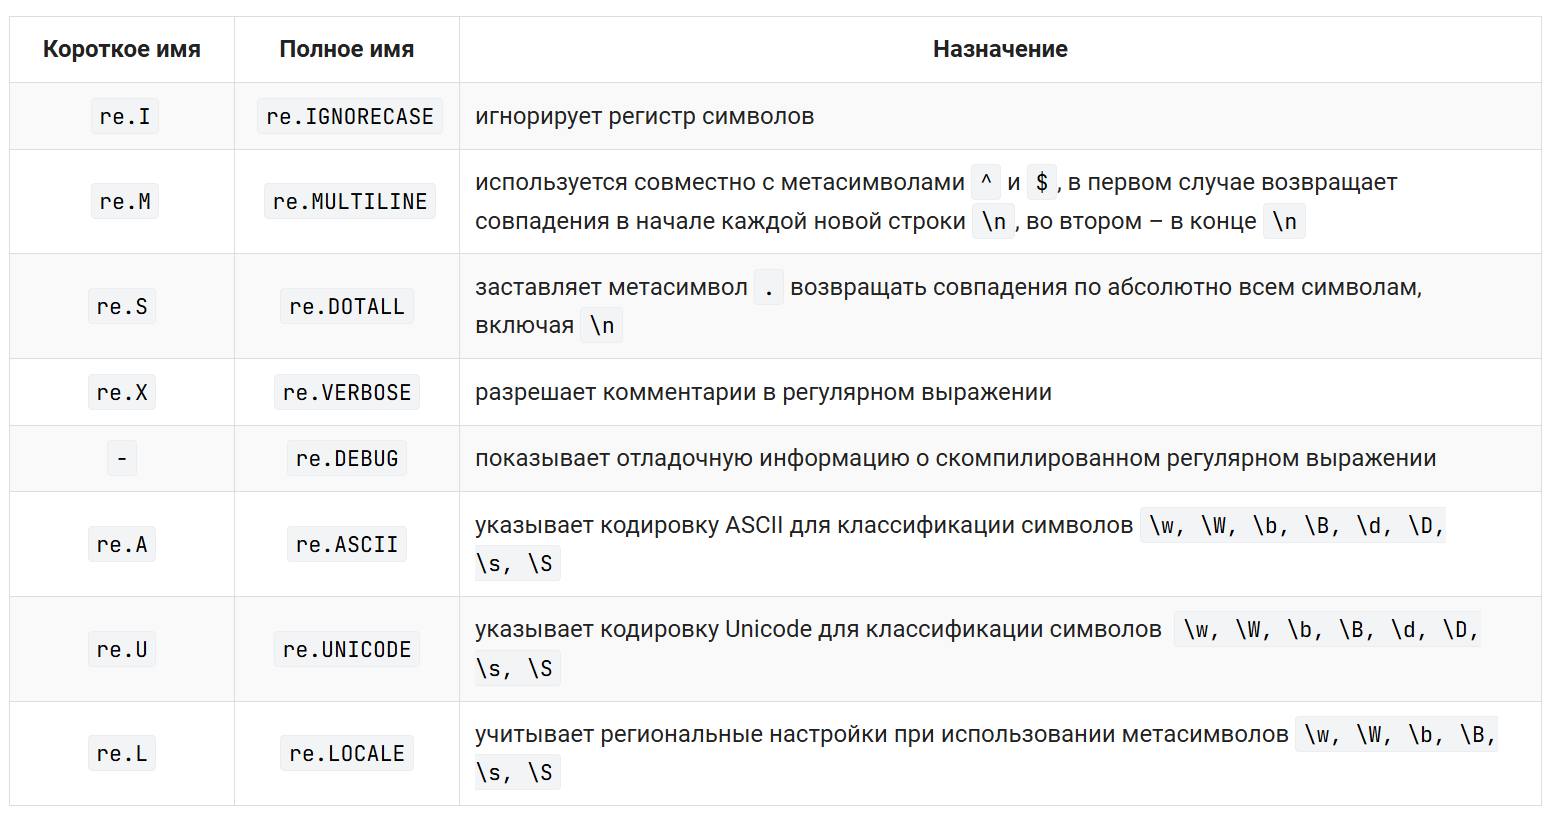

In [6]:
from functions import picture
picture('Без имени.png')

Наиболее часто используемые флаги:

re.IGNORECASE
re.MULTILINE
re.DOTALL

Рассмотрим каждый из них подробнее.

Флаг re.IGNORECASE

Флаг re.IGNORECASE (re.I) выполняет сопоставление без учета регистра.

In [7]:
import re

match1 = re.search('a+', 'aaaAAA')
match2 = re.search('A+', 'aaaAAA')
match3 = re.search('a+', 'aaaAAA', re.IGNORECASE)
match4 = re.search('A+', 'aaaAAA', re.I)

print(match1)
print(match2)
print(match3)
print(match4)

<re.Match object; span=(0, 3), match='aaa'>
<re.Match object; span=(3, 6), match='AAA'>
<re.Match object; span=(0, 6), match='aaaAAA'>
<re.Match object; span=(0, 6), match='aaaAAA'>


При первом поиске регулярному выражению a+ соответствует только первые три символа строки аааААА. При втором поиске регулярному выражению A+ соответствуют три последних символа. При третьем и четвертом поисках мы используем флаг re.IGNORECASE (re.I), поэтому синтаксический анализатор игнорирует регистр, и регулярным выражениям a+ и А+ соответствует вся строка.

In [10]:
import re

match1 = re.search('[a-z]+', 'aBcDeF')
match2 = re.search('[a-z]+', 'aBcDeF', re.I)

print(match1)
print(match2)

<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 6), match='aBcDeF'>


При отсутствии флага регулярному выражению [a-z]+ в строке aBcDeF соответствует только первый символ a. Указание флага re.I делает поиск нечувствительным к регистру, поэтому регулярному выражению [a-z]+ соответствует вся строка.

Флаг re.MULTILINE

По умолчанию метасимволы ^ и $ совпадают только с началом и концом всей строки, не учитывая наличие в строке символов \n.

In [11]:
import re

text = 'foo\nbar\nbaz'

print(re.search('^foo', text))
print(re.search('^bar', text))
print(re.search('^baz', text))
print(re.search('foo$', text))
print(re.search('bar$', text))
print(re.search('baz$', text))

<re.Match object; span=(0, 3), match='foo'>
None
None
None
None
<re.Match object; span=(8, 11), match='baz'>


Несмотря на то что строка  'foo\nbar\nbaz' содержит символы новой строки \n, мы получили только соответствие регулярному выражению ^foo и baz$.

Использование флага re.MULTILINE позволяет правильным образом обрабатывать символы \n, тем самым находя начала и концы всех строк с учетом символа \n.

In [12]:
import re

text = 'foo\nbar\nbaz'

print(re.search('^foo', text, re.MULTILINE))
print(re.search('^bar', text, re.MULTILINE))
print(re.search('^baz', text, re.MULTILINE))
print(re.search('foo$', text, re.M))
print(re.search('bar$', text, re.M))
print(re.search('baz$', text, re.M))

<re.Match object; span=(0, 3), match='foo'>
<re.Match object; span=(4, 7), match='bar'>
<re.Match object; span=(8, 11), match='baz'>
<re.Match object; span=(0, 3), match='foo'>
<re.Match object; span=(4, 7), match='bar'>
<re.Match object; span=(8, 11), match='baz'>


Флаг re.DOTALL

Флаг re.DOTALL (re.S) делает так, чтобы метасимвол . соответствовал любому символу, включая символ новой строки \n. Без этого флага метасимвол . соответствует любому символу, кроме новой строки.

In [13]:
import re

print(re.search('foo.bar', 'foo\nbar'))
print(re.search('foo.bar', 'foo\nbar', re.DOTALL))
print(re.search('foo.bar', 'foo\nbar', re.S))

None
<re.Match object; span=(0, 7), match='foo\nbar'>
<re.Match object; span=(0, 7), match='foo\nbar'>


Комбинация флагов

Мы можем использовать несколько флагов одновременно. Для этого нужно использовать оператор |.

In [14]:
import re

match = re.search('^bar', 'FOO\nBAR\nBAZ', re.I | re.M)

print(match)

<re.Match object; span=(4, 7), match='BAR'>


Оба флага IGNORECASE и MULTILINE были отработаны.

Функция escape()

Функция escape() выполняет экранирование специальных символов в строке. Это полезно в ситуациях, когда регулярное выражение представляет из себя простую строку, которая может содержать метасимволы.

Аргументы функции:

pattern — шаблон регулярного выражения

In [15]:
from re import escape

print(escape('http://www.stepik.org'))

http://www\.stepik\.org


Функция escape() выполнила экранирование символа точки ..

In [16]:
from re import escape

operators = ['+', '-', '*', '/', '**']
print(','.join(map(escape, operators)))

\+,\-,\*,/,\*\*


Функция escape() выполнила экранирование всех арифметических операторов, кроме /.

Примечания

Примечание 3. Флаг re.VERBOSE позволяет писать регулярные выражения, которые выглядят лучше и удобнее для чтения, позволяя визуально разделять логические разделы шаблона и добавлять комментарии.

In [18]:
import re

match = re.search(r'\d+\.\d*', 'Десятичное число равно 123.7')

print(match)

<re.Match object; span=(23, 28), match='123.7'>


с использованием флага re.VERBOSE можно записать в виде:

In [21]:
import re

match = re.search(r'''\d +  # целая часть
                     \.    # десятичная точка
                     \d *  # дробная часть''', 'Десятичное число равно 123.7', re.VERBOSE)

print(match)

<re.Match object; span=(23, 28), match='123.7'>


Примечание 4. Флаг re.DEBUG показывает отладочную информацию о скомпилированном регулярном выражении. Эту информацию можно использовать для понимания того, как будет осуществлен поиск.

In [24]:
import re

# print(re.search('x[123]{2,4}y', 'x222y'))
print(re.search('x[123]{2,4}y', 'x222y', re.DEBUG))

LITERAL 120
MAX_REPEAT 2 4
  IN
    LITERAL 49
    LITERAL 50
    LITERAL 51
LITERAL 121

 0. INFO 8 0b1 4 6 (to 9)
      prefix_skip 1
      prefix [0x78] ('x')
      overlap [0]
 9: LITERAL 0x78 ('x')
11. REPEAT_ONE 10 2 4 (to 22)
15.   IN 5 (to 21)
17.     RANGE 0x31 0x33 ('1'-'3')
20.     FAILURE
21:   SUCCESS
22: LITERAL 0x79 ('y')
24. SUCCESS
<re.Match object; span=(0, 5), match='x222y'>


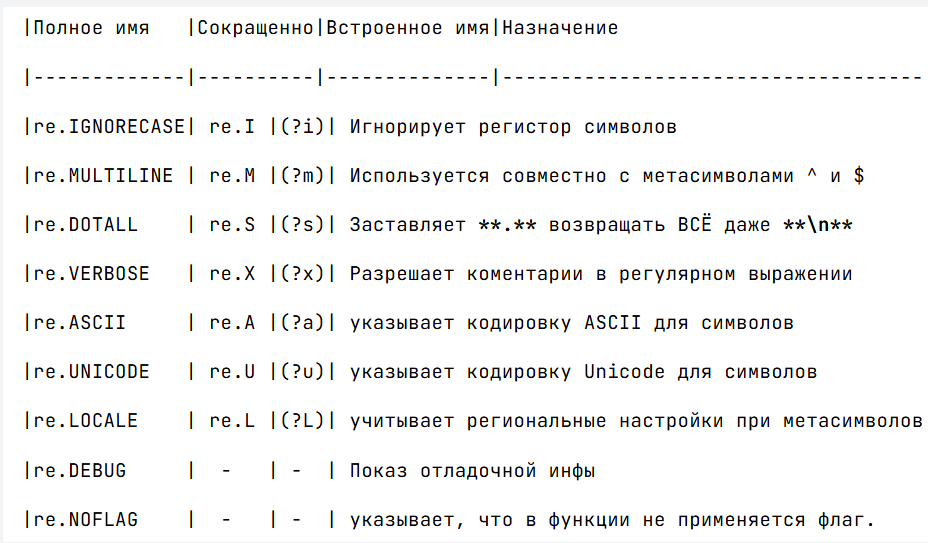

In [25]:
picture('Без имеfghни.png')

Встроенные флаги регулярных выражений
re.IGNORECASE (или (?i)):

Игнорирует регистр символов при поиске.
Пример: re.search(r'abc', 'ABC', re.IGNORECASE) вернет совпадение.
re.MULTILINE (или (?m)):

Позволяет ^ и $ соответствовать началу и концу каждой строки, а не только всей строки.
Пример: re.findall(r'^abc', 'abc\nabc', re.MULTILINE) вернет оба совпадения.
re.LOCALE (или (?L)):

Использует текущую локаль для обработки символов. Этот флаг может быть полезен для работы с символами, специфичными для определенной локали.
Пример: re.match(r'[a-z]', 'é', re.LOCALE) может работать по-разному в зависимости от установленной локали.
re.DOTALL (или (?s)):

Позволяет . соответствовать любому символу, включая символ новой строки.
Пример: re.search(r'abc.def', 'abc\ndef', re.DOTALL) вернет совпадение.

In [26]:
import re

text = """Hello World
hello world
HELLO WORLD"""

# Пример с re.IGNORECASE
matches = re.findall(r'hello', text, re.IGNORECASE)
print(matches)  # ['Hello', 'hello', 'HELLO']

# Пример с re.MULTILINE
multiline_text = """first line
second line
third line"""
matches = re.findall(r'^second', multiline_text, re.MULTILINE)
print(matches)  # ['second']

# Пример с re.DOTALL
dotall_text = "abc\ndef"
matches = re.search(r'abc.def', dotall_text, re.DOTALL)
print(matches.group())  # 'abc\ndef'

['Hello', 'hello', 'HELLO']
['second']
abc
def


Уважение
На электронную почту Тимура нередко приходят письма с предложением о сотрудничестве. Тимур ценит взаимное уважение и считает письмо достойным внимания, если оно начинается с одного из следующих выражений:

Здравствуйте
Доброе утро
Добрый день
Добрый вечер
Напишите программу, которая определяет, является ли письмо достойным внимания Тимура.

Формат входных данных
На вход программе подается единственная строка .

Формат выходных данных
Программа должна вывести True, если введенная строка начинается с одного из представленных в условии задачи выражений (в произвольном регистре), или False в противном случае.

In [29]:
import re

regex = r'^(Здравствуйте).*|^(Доброе утро).*|^(Добрый день).*|^(Добрый вечер).*'

# text = input()
text = 'здарова, я кирилл, хочу, чтобы ты сделал курс, суть такова...'

matches = re.findall(regex, text, re.IGNORECASE)
print(True if matches else False)

False


In [ ]:
import re

message = input()
pattern = r"^Здравствуйте|^Доброе утро|^Добрый (день|вечер).*"

match = re.match(pattern, message, re.I)
print(bool(match))

Социальные сети
Вам доступен набор популярных публикаций из социальной сети Твиттер, которые могут иметь следующий вид:

Люблю курсы BEEGEEK!
Когда курс по ООП? @timur_guev
BEEGEEK, спасибо за курсы, вы лучшие! #python #BeeGeek
и т.д.
Напишите программу, которая определяет, в скольких публикациях содержится строка beegeek.

Формат входных данных
На вход программе подается произвольное число строк, каждая из которых представляет очередную публикацию.

Формат выходных данных
Программа должна определить, в скольких введенных строках содержится строка beegeek в произвольном регистре, и вывести полученный результат.

In [37]:
import re, sys

multiline_text = """
Люблю курсы BEEGEEK!
Когда курс по ООП? @beegeek
BEEGEEK, спасибо за курсы, вы лучшие! #python #BeeGeek
"""
multiline_text = """
Нельзя быть дружелюбным соседом, если соседей нет
@everyone, посоветуйте курсы по программированию
"""
multiline_text = sys.stdin.read()

matches = re.findall(r'.*beegeek.*', multiline_text, re.MULTILINE | re.IGNORECASE)
print(len(matches))

[]
0
